<a href="https://colab.research.google.com/github/SarahGoddaer/Machine_Learning_course_UGent_D012554_kaggle/blob/master/Kaggle_eye_blinking_prediciton_workinprogress.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<font color='red'>WORK IN PROGRESS:</font> Final report: Kaggle eye blinking prediciton.**

In this report, I will point out the models and techniques I used to fit the traindata and with which I made accurate predictions during these six days.

I will mainly explain 2 models, *Support Vector Machine* and the *KNeighbors Classifier* in detail. Afterwards, I mention a stacking method and a technique using the Voting Classifier from sklearn.

## Support Vector Machine (SVM)
My first best model.

### **Loading data**

This is the first step. I load the trainset and the testset at the same time. Additionally, I save the data into understandable variables and I visualize it to have a first look. This first impression gives me the opportunity to get used to this data.   

In [0]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import metrics

#Loading data
trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")
testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

#Get features dataframe
features = trainset.copy()
features.pop('label')
feature_names = list(features.columns)

#Get test features without the index column
test_features = testset.copy()
test_features.pop('index')
test_feature_names = list(test_features.columns)

In [104]:
print("Trainset: " + str(features.shape))
print("Testset: " + str(test_features.shape))
features.head()

Trainset: (2000, 14)
Testset: (12892, 14)


,AF3,F7,F3,FC5,T7,P7,O1,02,P8,T8,FC6,F4,F8,AF4
0,4299.49,3997.44,4277.95,4116.92,4353.85,4623.08,4100.00,4623.59,4202.56,4229.23,4211.79,4278.97,4600.00,4369.23
1,4302.05,3985.64,4261.03,4129.74,4334.36,4615.38,4072.31,4585.64,4192.31,4225.13,4195.90,4283.08,4607.18,4358.46
2,4321.03,4015.90,4265.13,4122.56,4333.33,4613.33,4072.82,4602.05,4192.31,4223.08,4155.38,4286.15,4608.21,4371.79
3,4408.21,4104.10,4380.00,4232.31,4449.74,4750.26,4169.23,4731.28,4311.28,4352.31,4319.49,4388.21,4715.90,4464.10
4,4347.18,3975.38,4266.67,4102.56,4333.33,4617.95,4097.44,4612.82,4210.77,4240.51,4248.21,4313.33,4664.10,4411.79


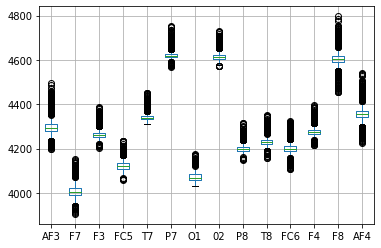

In [105]:
features.boxplot()

In [97]:
#How many measurements are there of the two classes?
print(trainset.label.value_counts())
#Are there missing values in some features?
print(features.isnull().sum()) 

0    1099
1     901
Name: label, dtype: int64
AF3    0
F7     0
F3     0
FC5    0
T7     0
P7     0
O1     0
02     0
P8     0
T8     0
FC6    0
F4     0
F8     0
AF4    0
dtype: int64


I can see from this that the ranges of the different features are not the same, so scaling will be appropriate to use if I want to perform predictions with SVM. Also, I now know that the trainset and testset indeed have 14 features and that the trainset is much smaller than the testset. 1099 instances of this trainset belong to class 0 (open eyes) and 901 instances belong to class 1 (eyes closed).  

### **Pre-processing**

Here, pre-processing the data is done through scaling the data. I don't change the features in any other way than scaling. However, I try different scaling methods. Here, I focussed on *Standerd scaling*, *MinMax scaling*, or *non-scaled* data.

I found information that scaling data around the mean should give the best performance for a SVM model, so I apply the *Standard scaler*. I will already transform the testset too, because this is easy readable this way and I don't have to think about it anymore. This step of transforming the testset doesn't necessarily need to be done here, because this is only needed just before performing predictions.

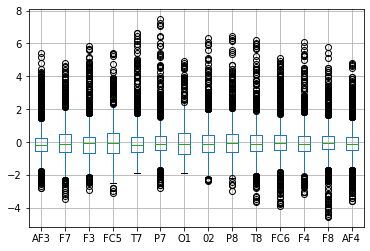

In [98]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler()
features = scaler.fit_transform(features)
test_features = scaler.transform(test_features)

features = pd.DataFrame(features, columns=feature_names)
test_features = pd.DataFrame(test_features, columns=test_feature_names)

#Visualizing the scaled trainset features
features.boxplot()

From these boxplots, you can see that all features are now centered around the mean. I will work with these scaled features to find a useful SVM model.

###**Defining the model**

I have a choice between many models that are supported by Sklearn. One of these models is the *Support Vector Machine* model. This model is designed to solve two-class classification problems, which is exactly what we have in this project. With the specific *kernel functions* this model can compute not only linear decision boundaries, but also more complicated non-linear decision boundaries without explicitaly having to map the features to new polynomial features. 

In [0]:
from sklearn.svm import SVC
model = SVC()

###**Model validation**

Now that I chose this model, I want to know how good the model performes on the trainset and even more, I actually want to know how good it performes on the testset. Unfortunately, I can not test the performance of the model on the testset, because a testset has no labels of course because this functions as unseen data. To simulate the performance on the testset I use *Cross-validation* (CV) to estimate the performance on the testset.

In [100]:
score = cross_val_score(model, features, trainset.label,scoring='roc_auc', cv= 20).mean()
print('AUC score for trainset: '+ str(score))

AUC score for trainset: 0.897083809105548


As you can see, this is an AUC score of 89,71%, which means that the model with its default values is not a bad choice to use for this data.

I can check if *Standard scaling* realy is the best choice for this model and this dataset. I can use the same validation method and look at the AUC scores for the model fitted on *non-scaled* data and on *MinMax scaled* data.

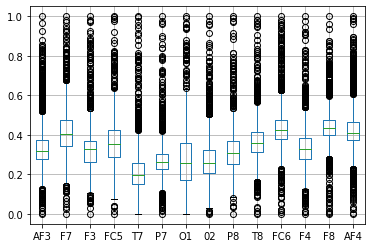

In [106]:
#MinMax scaling
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = preprocessing.MinMaxScaler()
features = scaler.fit_transform(features)
test_features = scaler.transform(test_features)

features = pd.DataFrame(features, columns=feature_names)
test_features = pd.DataFrame(test_features, columns=test_feature_names)

#Visualizing the scaled trainset features
features.boxplot()

In [107]:
score = cross_val_score(model, features, trainset.label,scoring='roc_auc', cv= 20).mean()
print('AUC score for MinMax scaled trainset: '+ str(score))

AUC score for MinMax scaled trainset: 0.8796913336261163


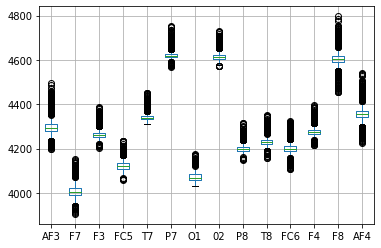

In [109]:
#Loading data
trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")
testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

#Get features dataframe
features = trainset.copy()
features.pop('label')
feature_names = list(features.columns)

#Get test features without the index column
test_features = testset.copy()
test_features.pop('index')
test_feature_names = list(test_features.columns)

features.boxplot()

In [110]:
#Non-scaled data
score = cross_val_score(model, features, trainset.label,scoring='roc_auc', cv= 20).mean()
print('AUC score for non-scaled trainset: '+ str(score))

AUC score for non-scaled trainset: 0.6246116966769141


These 3 AUC scores clearly show that *Standard scaler* is the best scaling method to transform the data in this case.

###**Regularization**

The next step is highering the AUC score. This means I have to refine my model with better hyperparameters. I do this with *GridSearchCV*. This system has again the CV implemented, which makes this a good way to evaluate the hyperparameters.

In [29]:
#How do the parameters look like in this model?
model.get_params

<bound method BaseEstimator.get_params of SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)>

In [33]:
from sklearn.model_selection import GridSearchCV

Cs = [1,10, 20, 50, 80, 100]
gammas = ['scale', 'auto',1, 0.01]

model = SVC(probability=True)
params = dict(C=Cs, gamma=gammas)
grid_search = GridSearchCV(model, param_grid=params, scoring='roc_auc', cv=20)
grid_search.fit(features, trainset.label)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 10, 'gamma': 1}
0.9632607963694919


I can try to refine the hyperparameter C even more:

In [83]:
from sklearn.model_selection import GridSearchCV

Cs = [4,5,6,7,8,9,10]

model = SVC(gamma=1, probability=True)
params = dict(C=Cs)
grid_search = GridSearchCV(model, param_grid=params, scoring='roc_auc', cv=30)
grid_search.fit(features, trainset.label)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'C': 8}
0.9645392704532489


The model validation score seems to be the best score I can obtain with C = 8 and gamma =1. So, I deside to use the SVM model with these optimized parameter values.

In [37]:
#The SVM model with the best hyperparameter values
print(grid_search.best_estimator_)
print('AUC score for trainset: ' + str(grid_search.best_score_))

SVC(C=8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
AUC score for trainset: 0.9645392704532489


###**Predictions**

As a last step in the process, I want to do predictions with my optimized model. Therefore, I first need to *fit* the model to the trainset, then make *predictions* and lastly I can save the predicted probabilities for the positive class into a *csv-file*.

In [84]:
#Define model
model = grid_search.best_estimator_

#Fit model
model.fit(features,trainset.label)

#Make predictions
predictions = model.predict_proba(test_features)[:,1]

results_SVM = pd.DataFrame({'index': testset['index'], 'label': predictions})
results_SVM.head()

,index,label
0,0,0.002728
1,1,0.361742
2,2,0.005593
3,3,0.999983
4,4,0.953498


In [0]:
filename = "my_prediction_results_SVM.csv"
results_SVM.to_csv(filename,index=False)

## KNeighbors Classifier
My second best model.
<font color='red'>Nog een tekstje bij da da geen geleide azo is gelijk SVM</font> 

###**Loading data**

In [0]:
#Loading data
trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")
testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

#Get features dataframe
features = trainset.copy()
features.pop('label')
feature_names = list(features.columns)

#Get test features without the index column
test_features = testset.copy()
test_features.pop('index')
test_feature_names = list(test_features.columns)

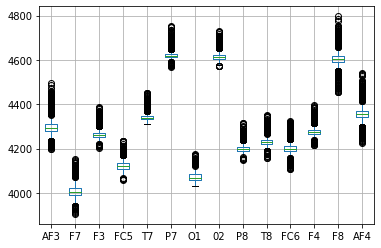

In [51]:
features.boxplot()

### **Pre-processing + Defining the model**

Here, I can do the same as pointed out for the SVM model. I can try different scaling methods, such as *non-scaled data*, *Standerd scaling*, or *MinMax scaling*. 
Afterwards I evaluate the performance of the *KNN* model on the different transformed features.

In [52]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

#Score on non-scaled data
score = cross_val_score(model, features, trainset.label,scoring='roc_auc', cv= 20).mean()
print('AUC score for trainset: '+ str(score))

AUC score for trainset: 0.9442850241545893


In [0]:
#Standard scaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler = preprocessing.StandardScaler()
features = scaler.fit_transform(features)
test_features = scaler.transform(test_features)

features = pd.DataFrame(features, columns=feature_names)
test_features = pd.DataFrame(test_features, columns=test_feature_names)

In [47]:
score = cross_val_score(model, features, trainset.label,scoring='roc_auc', cv= 20).mean()
print('AUC score for Standard scaled trainset: '+ str(score))

AUC score for Standard scaled trainset: 0.9417285170546041


In [0]:
#MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scaler = preprocessing.MinMaxScaler()
features = scaler.fit_transform(features)
test_features = scaler.transform(test_features)

features = pd.DataFrame(features, columns=feature_names)
test_features = pd.DataFrame(test_features, columns=test_feature_names)

In [54]:
score = cross_val_score(model, features, trainset.label,scoring='roc_auc', cv= 20).mean()
print('AUC score for MinMax scaled trainset: '+ str(score))

AUC score for MinMax scaled trainset: 0.9430438076416339


These 3 scores suggest that *non-scaled* data would work best for fitting this model on the trainset. This is different compared to the *Standard scaled data* to be used in the SVM model.

To make the workflow of this notebook easy, I import the datasets once more, to be sure that the data is not scaled.

In [0]:
#Loading data
trainset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_train.csv")
testset = pd.read_csv("https://raw.githubusercontent.com/sdgroeve/Machine_Learning_course_UGent_D012554_kaggle/master/eeg_test.csv")

#Get features dataframe
features = trainset.copy()
features.pop('label')
feature_names = list(features.columns)

#Get test features without the index column
test_features = testset.copy()
test_features.pop('index')
test_feature_names = list(test_features.columns)

###**Regularization**

Again like SVM, a *KNN* model has some hyperparameters that can be set by myself in order to gain better performance. I find new values with *GridsearchCV*.

In [59]:
#Which parameters?
model.get_params

<bound method BaseEstimator.get_params of KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')>

In [60]:
from sklearn.model_selection import GridSearchCV

neighbors = [2,3,4,5,6,7]
weigh = ['uniform', 'distance']
ps = [1,1.5,2,2.5,3]
leafs = [20,25,30,35,40]

params = dict(n_neighbors=neighbors, weights=weigh,p=ps, leaf_size=leafs)
grid_search = GridSearchCV(model, param_grid=params, scoring='roc_auc', cv=20)
grid_search.fit(features, trainset.label)

print(grid_search.best_params_)
print(grid_search.best_score_)

{'leaf_size': 20, 'n_neighbors': 4, 'p': 2.5, 'weights': 'distance'}
0.9612608329673547


I can try to refine the *leaf_size* more, because this was at the lower border now of my search space for this parameter. Maybe the score betters when I choose an even lower value.

In [64]:
from sklearn.model_selection import GridSearchCV

model = KNeighborsClassifier(n_neighbors=4, p=2.5, weights='distance')

leafs = [1,3,5,10,20]

params = dict(leaf_size=leafs)
grid_search = GridSearchCV(model, param_grid=params, scoring='roc_auc', cv=20)
grid_search.fit(features, trainset.label)

print(grid_search.best_params_)
print(grid_search.best_score_)
print(grid_search.best_estimator_)

{'leaf_size': 1}
0.9612608329673547
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2.5,
                     weights='distance')


I can have a closer look at the results of this GridSearchCV:

In [65]:
means = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']

for mean_score, std, params in zip(means, stds, grid_search.cv_results_['params']):
    print("{:.4f} (+/-{:.4f}) for {}".format(mean_score, std * 2, params))

0.9613 (+/-0.0312) for {'leaf_size': 1}
0.9613 (+/-0.0312) for {'leaf_size': 3}
0.9613 (+/-0.0312) for {'leaf_size': 5}
0.9613 (+/-0.0312) for {'leaf_size': 10}
0.9613 (+/-0.0312) for {'leaf_size': 20}


These results suggest that the *leaf_size* doesn't realy matter that much for a better CV performance. I choose to go further with leaf_size = 1.

###Model validation

According to these GridsearchCV results, I can conclude that the best optimized *KNN* model can be defined as follows, accompagnied with following AUC score:

In [68]:
print(grid_search.best_estimator_)
print('AUC score for trainset: ' + str(grid_search.best_score_))

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2.5,
                     weights='distance')
AUC score for trainset: 0.9612608329673547


###Predictions

This last step is exactly the same as described above for the SVM model.

In [74]:
#Define model
model = grid_search.best_estimator_

#Fit model
model.fit(features,trainset.label)

#Make predictions
predictions = model.predict_proba(test_features)[:,1]

results_KNN = pd.DataFrame({'index': testset['index'], 'label': predictions})
results_KNN.head()

,index,label
0,0,0.000000
1,1,0.746633
2,2,0.000000
3,3,1.000000
4,4,1.000000


In [0]:
filename = "my_prediction_results_KNN.csv"
results_KNN.to_csv(filename,index=False)

##Extra: Voting Classifier